In [5]:
import pandas as pd

from deepmol.compound_featurization import generate_conformers_to_sdf_file
from deepmol.loaders import CSVLoader

dataset = CSVLoader("alkaloid_data_processed.csv", id_field="CID",
                    smiles_field="SMILES", labels_fields=['C00078', 'C00082', 'C00148', 'C00108', 'C00047',
                                                          'C00062', 'C03506', 'C00353', 'C00041', 'C00049',
                                                          'C01852', 'C00079','C00129', 'C00135', 'C00187']).create_dataset()


2023-07-03 16:11:26.367732: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 16:11:26.396924: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 16:11:26.397338: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 16:11:26.895826: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.


2023-07-03 16:11:28,496 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!


/home/bisbii/anaconda3/envs/sm_precursor_predictor/lib/python3.9/site-packages/deepmol/compound_featurization/__init__.py:20: UserWarning: Mol2Vec not available. Please install it to use it.
  warnings.warn("Mol2Vec not available. Please install it to use it.")


In [6]:
len(dataset.mols)

576

In [1]:
import pandas as pd

aliases = pd.read_csv("alkaloid_data_precursors.csv")

In [2]:
alkaloid_data = pd.read_csv("alkaloid_data.csv")
columns = []
for column in alkaloid_data.columns:
    if column in aliases.columns:
        columns.append(aliases[column][0])
    else:
        columns.append(column)

In [3]:
columns

['Name',
 'CID',
 'PM',
 'SMILES',
 'C00078',
 'C00082',
 'C00148',
 'C00108',
 'C00047',
 'C00062',
 'C03506',
 'C00353',
 'C00041',
 'C00049',
 'C01852',
 'C00079',
 'C00129',
 'C00135',
 'C00187']

In [4]:
alkaloid_data.columns = columns
alkaloid_data.to_csv("alkaloid_data_processed.csv", index=False)

In [26]:
columns

['Name',
 'CID',
 'PM',
 'SMILES',
 'C00078',
 'C00082',
 'C00148',
 'C00108',
 'C00047',
 'C00062',
 'C03506 ',
 'C00353',
 'C00041',
 'C00049',
 'C01852',
 'C00079',
 'C00129',
 'C00135',
 'C00187']

In [2]:
generate_conformers_to_sdf_file(dataset, "alkaloid_conformers.sdf", n_conformations=20, threads=30, max_iterations=500, timeout_per_molecule=1000, etkg_version=3)

 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||-| 99.8% 

In [1]:
from deepmol.loaders import SDFLoader

dataset = SDFLoader("alkaloid_conformers.sdf",id_field="_ID", labels_fields=['C00078', 'C00082', 'C00148', 'C00108', 'C00047',
                                                          'C00062', 'C03506', 'C00353', 'C00041', 'C00049',
                                                          'C01852', 'C00079','C00129', 'C00135', 'C00187']).create_dataset()

2023-06-07 10:09:47,911 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!


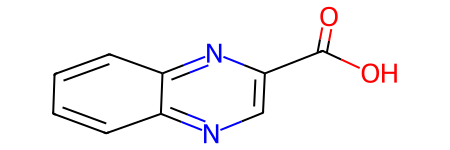

In [11]:
dataset.mols[217]

In [4]:
dataset = SDFLoader("terpenoids_phenolics.sdf",labels_fields=['C00078', 'C00082', 'C00148', 'C00108', 'C00047',
                                                          'C00062', 'C03506', 'C00353', 'C00041', 'C00049',
                                                          'C01852', 'C00079','C00129', 'C00135', 'C00187']).create_dataset()

2023-06-07 09:10:37,725 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!


[09:10:37] WARNING: not removing hydrogen atom without neighbors


In [ ]:
generate_conformers_to_sdf_file(dataset, "terpenoids_phenolics_conformers.sdf", n_conformations=20, threads=30, max_iterations=500, timeout_per_molecule=30, etkg_version=3)

 |----------------------------------------------------------------------------------------------------| 0.9% 

[09:11:23] WARNING: not removing hydrogen atom without neighbors


 |||||||----------------------------------------------------------------------------------------------| 6.9% 2023-06-07 09:18:49,113 — INFO — Timeout for molecule 61
 ||||||||---------------------------------------------------------------------------------------------| 7.5% 2023-06-07 09:20:18,344 — INFO — Timeout for molecule 66
 ||||||||---------------------------------------------------------------------------------------------| 7.6% 2023-06-07 09:21:37,315 — INFO — Timeout for molecule 67
 ||||||||---------------------------------------------------------------------------------------------| 7.7% 2023-06-07 09:23:31,042 — INFO — Timeout for molecule 68
 |||||||||--------------------------------------------------------------------------------------------| 8.3% 2023-06-07 09:26:10,957 — INFO — Timeout for molecule 73
 |||||||||--------------------------------------------------------------------------------------------| 8.4% 2023-06-07 09:27:58,713 — INFO — Timeout for molecule 74
 |||